# 

In [1]:
from parameter_tuning import train_model
from rnn_layers import PredictTime
import torch
import torch.optim as optim
import torch.nn as nn
from parse_data import get_data, get_modified_values, get_binary_values, make_data_scalar

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device: ", device)


# Hyperparameters
sequence_length = [5,15,50,100,200]
hidden_layers = [2, 5, 10]
hidden_size = [10, 25, 50, 100]
lr = [0.001, 0.01, 0.1, 0.005, 0.05,0.5]
epochs = 5000
optimizer = [optim.Adam]

Using device:  cuda


In [2]:
def make_data(df, device):

    x_train, y_train = [], []
    prev = None

    for row in df:
        if prev is None:
            prev = row
        x_train.append(prev)
        y_train.append(row)
        prev = row
    print(x_train[0].size())
    return torch.stack(x_train).float().to(device),torch.stack(y_train).float().to(device)

make_data(get_binary_values(get_data()), device)

torch.Size([1])


(tensor([[1.],
         [1.],
         [0.],
         ...,
         [1.],
         [0.],
         [1.]], device='cuda:0'),
 tensor([[1.],
         [0.],
         [1.],
         ...,
         [0.],
         [1.],
         [1.]], device='cuda:0'))

In [3]:
import matplotlib.pyplot as plt
def draw_model(m, x , y, conf):
    df = get_data() 

    res = []
    m.eval()
    m.clean_state()
    prev = x[0][0]
    for i in x:
        t = torch.tensor([[prev]]).to(device)
        prev = i
        val = m(t)
        res.append(val.detach().cpu()[0])

    fig, ax = plt.subplots(2)
    
    ax[0].plot(range(1,51), res[:50])
    ax[0].plot( range(1,51), y[:50].cpu())

    ax[1].plot(range(2000,2050), res[2000:2050])
    
    ax[1].plot(range(2000,2050), y[2000:2050].cpu() )
    fig.suptitle("%s" % conf)
    fig.savefig("images/forcing%s.png" % conf)
    
    
    res = []
    m.eval()
    m.clean_state()
    prev = x[0][0]
    for i in x:
        t = torch.tensor([[prev]]).to(device)
        val = m(t)
        prev = val
        res.append(val.detach().cpu()[0])

    fig, ax = plt.subplots(2)
    
    ax[0].plot(range(1,51), res[:50])
    ax[0].plot( range(1,51), y[:50].cpu())

    ax[1].plot(range(2000,2050), res[2000:2050])
    
    ax[1].plot(range(2000,2050), y[2000:2050].cpu() )
    fig.suptitle("%s" % conf)
    fig.savefig("images/not_forcing%s.png" % conf)
    

In [4]:
import random

options = []

for seq_len in sequence_length:
    for layers in hidden_layers:
        for hidden in hidden_size:
            for forcing in [True, False]:
                for l in lr:
                    entry = {}
                    entry["seq_len"] = seq_len
                    entry["layers"] = layers
                    entry["hidden"] = hidden
                    entry["forcing"] = forcing
                    entry["l"] = l
                    options.append(entry)
                
                                         
random.shuffle(options)    


Max value:  1000
Running model:  {'seq_len': 5, 'layers': 10, 'hidden': 100, 'forcing': False, 'l': 0.5}  epochs:  5000
New best model:
New loss:  [4995, tensor(0.3179), tensor(0.3409)] 
Old loss:  
History: [[4860, tensor(0.3236), tensor(0.3435)], [4875, tensor(0.3575), tensor(0.3591)], [4890, tensor(0.3701), tensor(0.3779)], [4905, tensor(0.3196), tensor(0.3598)], [4920, tensor(0.3253), tensor(0.3610)], [4935, tensor(0.3370), tensor(0.3336)], [4950, tensor(0.3535), tensor(0.3531)], [4965, tensor(0.3191), tensor(0.3418)], [4980, tensor(0.3667), tensor(0.3672)], [4995, tensor(0.3179), tensor(0.3409)]]


/opt/conda/lib/python3.10/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/opt/conda/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Running model:  {'seq_len': 5, 'layers': 10, 'hidden': 25, 'forcing': True, 'l': 0.1}  epochs:  5000
New best model:
New loss:  [4995, tensor(0.3033), tensor(0.3033)] 
Old loss: [4995, tensor(0.3179), tensor(0.3409)] 
History: [[4860, tensor(0.3037), tensor(0.3037)], [4875, tensor(0.3040), tensor(0.3040)], [4890, tensor(0.3046), tensor(0.3046)], [4905, tensor(0.3037), tensor(0.3037)], [4920, tensor(0.3032), tensor(0.3032)], [4935, tensor(0.3038), tensor(0.3038)], [4950, tensor(0.3037), tensor(0.3037)], [4965, tensor(0.3036), tensor(0.3036)], [4980, tensor(0.3036), tensor(0.3036)], [4995, tensor(0.3033), tensor(0.3033)]]


/opt/conda/lib/python3.10/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/opt/conda/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Running model:  {'seq_len': 50, 'layers': 2, 'hidden': 100, 'forcing': False, 'l': 0.001}  epochs:  5000
New best model:
New loss:  [4995, tensor(0.2715), tensor(0.3119)] 
Old loss: [4995, tensor(0.3033), tensor(0.3033)] 
History: [[4860, tensor(0.3111), tensor(0.3110)], [4875, tensor(0.2763), tensor(0.3114)], [4890, tensor(0.2786), tensor(0.3107)], [4905, tensor(0.2824), tensor(0.3085)], [4920, tensor(0.2822), tensor(0.3124)], [4935, tensor(0.2757), tensor(0.3097)], [4950, tensor(0.2797), tensor(0.3096)], [4965, tensor(0.3089), tensor(0.3088)], [4980, tensor(0.2758), tensor(0.3090)], [4995, tensor(0.2715), tensor(0.3119)]]


/opt/conda/lib/python3.10/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/opt/conda/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Running model:  {'seq_len': 50, 'layers': 2, 'hidden': 50, 'forcing': True, 'l': 0.05}  epochs:  5000
Old model still stands:
Current loss:  [4995, tensor(0.3051), tensor(0.3051)] 
Best loss: [4995, tensor(0.2715), tensor(0.3119)]
Running model:  {'seq_len': 15, 'layers': 10, 'hidden': 25, 'forcing': False, 'l': 0.1}  epochs:  5000
Old model still stands:
Current loss:  [4995, tensor(0.2877), tensor(0.3119)] 
Best loss: [4995, tensor(0.2715), tensor(0.3119)]
Running model:  {'seq_len': 100, 'layers': 2, 'hidden': 25, 'forcing': True, 'l': 0.001}  epochs:  5000
Old model still stands:
Current loss:  [4995, tensor(0.3051), tensor(0.3051)] 
Best loss: [4995, tensor(0.2715), tensor(0.3119)]
Running model:  {'seq_len': 200, 'layers': 10, 'hidden': 100, 'forcing': True, 'l': 0.005}  epochs:  5000


KeyboardInterrupt: 

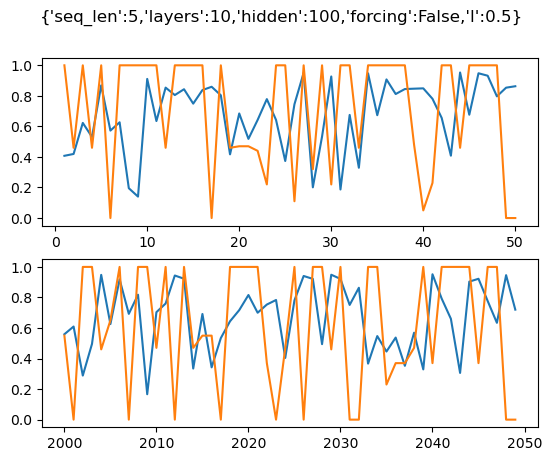

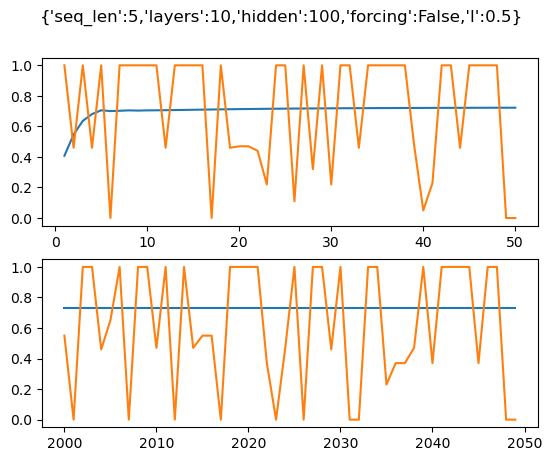

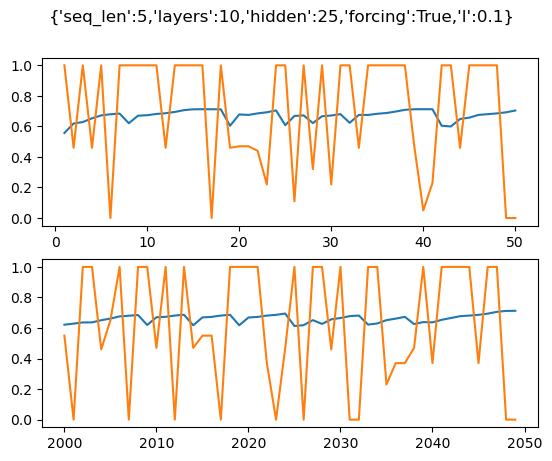

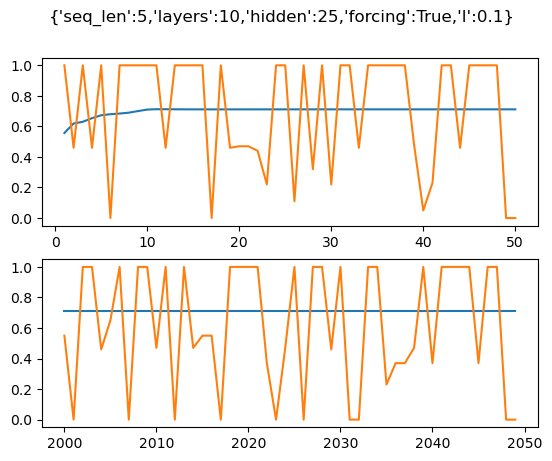

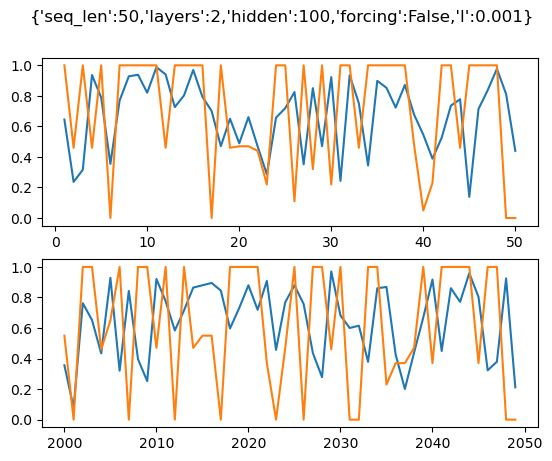

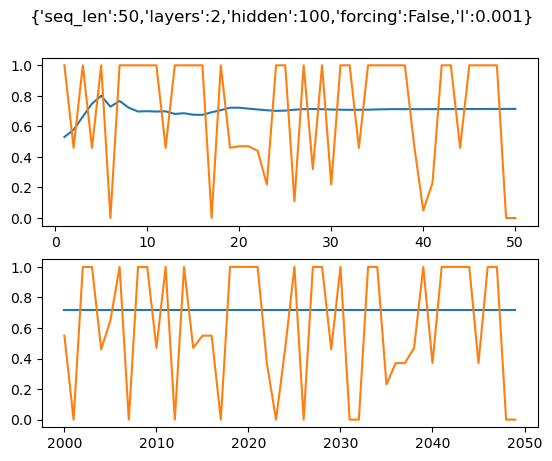

In [5]:
%load_ext line_profiler
x_d, y_d = make_data_scalar(get_data(), device)

best_model = None
best_history = [""]
best_score = 100000000000000
for entry in options:
    model = PredictTime(input_size=x_d[0].size()[0],
                        output_size=y_d[0].size()[0],
                        hidden_layers=entry["layers"],
                        hidden_size=entry["hidden"],
                        device=device).to(device)
    print("Running model: ", entry, " epochs: ", epochs)
    #%lprun -f train_model train_model(model=model,x_data=x_d,y_data=y_d,sequence_length=entry["seq_len"],epochs=epochs,loss=nn.BCELoss(),optimizer=optim.Adam,strict_teacher_forcing=entry["forcing"])
    #break
    model, history = train_model(model=model,
                                 x_data=x_d,
                                 y_data=y_d,
                                 sequence_length=entry["seq_len"],
                                 epochs=epochs,
                                 loss=nn.BCELoss(),
                                 optimizer=optim.Adam,
                                 strict_teacher_forcing=entry["forcing"])
    if history[-1][1] < best_score:
        print("New best model:\nNew loss: ", history[-1], "\nOld loss:", best_history[-1], "\nHistory:" , history[-10:])
        best_model = model
        best_history = history
        best_score = history[-1][1]
        draw_model(best_model, x_d, y_d, str(entry).replace(" ", ""))
    else:
        print("Old model still stands:\nCurrent loss: ", history[-1], "\nBest loss:", best_history[-1])
                                 

    